In [20]:

import numpy as np
import pandas as pd
import pickle

# Load the datasets
ingr_map = pd.read_pickle("ingr_map.pkl")
raw_recipes = pd.read_csv("RAW_recipes.csv")
raw_interactions = pd.read_csv("RAW_interactions.csv")
pp_users = pd.read_csv("PP_users.csv")
pp_recipes = pd.read_csv("PP_recipes.csv")
interactions_validation = pd.read_csv("interactions_validation.csv")
interactions_train = pd.read_csv("interactions_train.csv")
interactions_test = pd.read_csv("interactions_test.csv")


# Show some basic information about each dataset
datasets = {
    'ingr_map': ingr_map,
    'raw_recipes': raw_recipes,
    'raw_interactions': raw_interactions,
    'pp_users': pp_users,
    'pp_recipes': pp_recipes,
    'interactions_validation': interactions_validation,
    'interactions_train': interactions_train,
    'interactions_test': interactions_test
}

info_dict = {}

for name, dataset in datasets.items():
    info_dict[name] = {
        'Number of Rows': dataset.shape[0],
        'Number of Columns': dataset.shape[1],
        'Columns': ', '.join(dataset.columns)
    }

info_df = pd.DataFrame(info_dict).T
info_df


,Number of Rows,Number of Columns,Columns
ingr_map,11659,7,"raw_ingr, raw_words, processed, len_proc, repl..."
raw_recipes,231637,12,"name, id, minutes, contributor_id, submitted, ..."
raw_interactions,1132367,5,"user_id, recipe_id, date, rating, review"
pp_users,25076,6,"u, techniques, items, n_items, ratings, n_ratings"
pp_recipes,178265,8,"id, i, name_tokens, ingredient_tokens, steps_t..."
interactions_validation,7023,6,"user_id, recipe_id, date, rating, u, i"
interactions_train,698901,6,"user_id, recipe_id, date, rating, u, i"
interactions_test,12455,6,"user_id, recipe_id, date, rating, u, i"


In [21]:
ingr_map

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [3]:
pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [4]:
ingr_map

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [5]:
interactions_train

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [6]:
raw_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [7]:
raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


# Model building and Evaluation

# Trend Analysis 

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Example: Replace missing values in 'calorie_level' with the mean
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
# Example: Convert 'name_tokens' from strings to lists
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for each task
# Example: For nutritional clustering, use 'ingredient_tokens' and 'calorie_level'
nutritional_features = df[['ingredient_tokens', 'calorie_level']]

# Example: For trend identification, use 'ingredient_tokens' and 'steps_tokens'
trend_features = df[['ingredient_tokens', 'steps_tokens']]

# Example: For difficulty classification, use 'steps_tokens' and 'calorie_level'
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Save the preprocessed data (if needed)
nutritional_features.to_csv('nutritional_data.csv', index=False)
trend_features.to_csv('trend_data.csv', index=False)
difficulty_features.to_csv('difficulty_data.csv', index=False)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


In [ ]:
#AgglomerativeClustering Takes a long time due to a large data 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Example: Replace missing values in 'calorie_level' with the mean
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
# Example: Convert 'name_tokens' from strings to lists
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for each task
# Example: For nutritional clustering, use 'ingredient_tokens' and 'calorie_level'
nutritional_features = df[['ingredient_tokens', 'calorie_level']]

# Convert ingredient lists to strings (space-separated)
nutritional_features['ingredient_tokens'] = nutritional_features['ingredient_tokens'].apply(lambda x: ' '.join(map(str, x)))

# Vectorize ingredients using TF-IDF
vectorizer = TfidfVectorizer(lowercase=False)
ingredient_vectors = vectorizer.fit_transform(nutritional_features['ingredient_tokens'])

# Normalize calorie levels
scaler = StandardScaler()
calorie_levels = scaler.fit_transform(nutritional_features['calorie_level'].values.reshape(-1, 1))

# Combine ingredient and calorie vectors
nutritional_features = np.hstack((ingredient_vectors.toarray(), calorie_levels))

# Apply Agglomerative Clustering
n_clusters = 5  # Define the number of clusters
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering_model.fit_predict(nutritional_features)

# Add cluster labels to the original dataset
df['nutritional_cluster'] = clusters

# Save the preprocessed data with cluster labels (if needed)
# df.to_csv('nutritional_clustered_data.csv', index=False)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19627/2832030015.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutritional_features['ingredient_tokens'] = nutritional_features['ingredient_tokens'].apply(lambda x: ' '.join(map(str, x)))


# Kmeans clustering

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Example: Replace missing values in 'calorie_level' with the mean
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
# Example: Convert 'name_tokens' from strings to lists
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for each task
# Example: For nutritional clustering, use 'ingredient_tokens' and 'calorie_level'
nutritional_features = df[['ingredient_tokens', 'calorie_level']]

# Convert ingredient lists to strings (space-separated)
nutritional_features['ingredient_tokens'] = nutritional_features['ingredient_tokens'].apply(lambda x: ' '.join(map(str, x)))

# Vectorize ingredients using TF-IDF
vectorizer = TfidfVectorizer(lowercase=False)
ingredient_vectors = vectorizer.fit_transform(nutritional_features['ingredient_tokens'])

# Normalize calorie levels
scaler = StandardScaler()
calorie_levels = scaler.fit_transform(nutritional_features['calorie_level'].values.reshape(-1, 1))

# Combine ingredient and calorie vectors
nutritional_features = np.hstack((ingredient_vectors.toarray(), calorie_levels))


# Apply K-Means Clustering (faster than Agglomerative Clustering)
n_clusters = 5  # Define the number of clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans_model.fit_predict(nutritional_features)
print(clusters)

# Add cluster labels to the original dataset using .loc to avoid the warning
df.loc[:, 'nutritional_cluster'] = clusters

# Save the preprocessed data with cluster labels (if needed)
df.to_csv('nutritional_clustered_data.csv', index=False)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_36105/641004970.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutritional_features['ingredient_tokens'] = nutritional_features['ingredient_tokens'].apply(lambda x: ' '.join(map(str, x)))
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 2 4 ... 1 3 2]


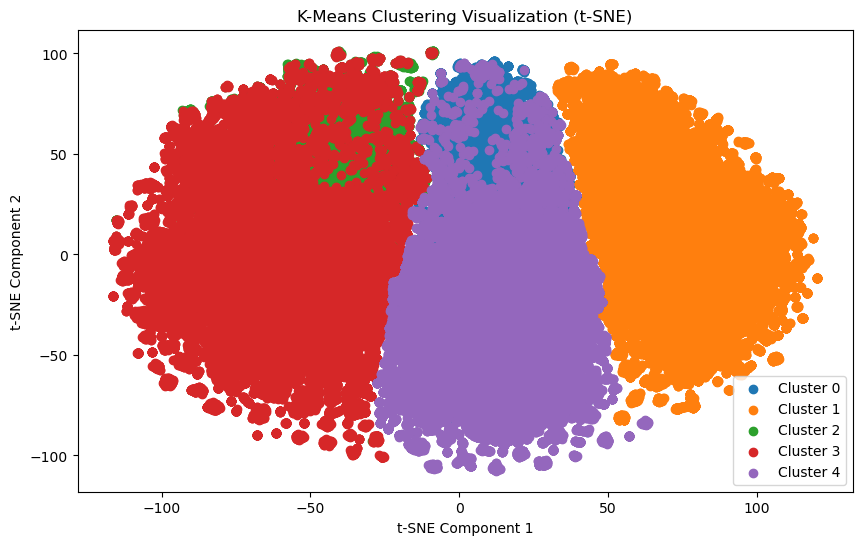

In [4]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
nutritional_features_tsne = tsne.fit_transform(nutritional_features)

# Add t-SNE components to the DataFrame
df['TSNE1'] = nutritional_features_tsne[:, 0]
df['TSNE2'] = nutritional_features_tsne[:, 1]

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = df[df['nutritional_cluster'] == cluster_label]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster_label}')

plt.title('K-Means Clustering Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


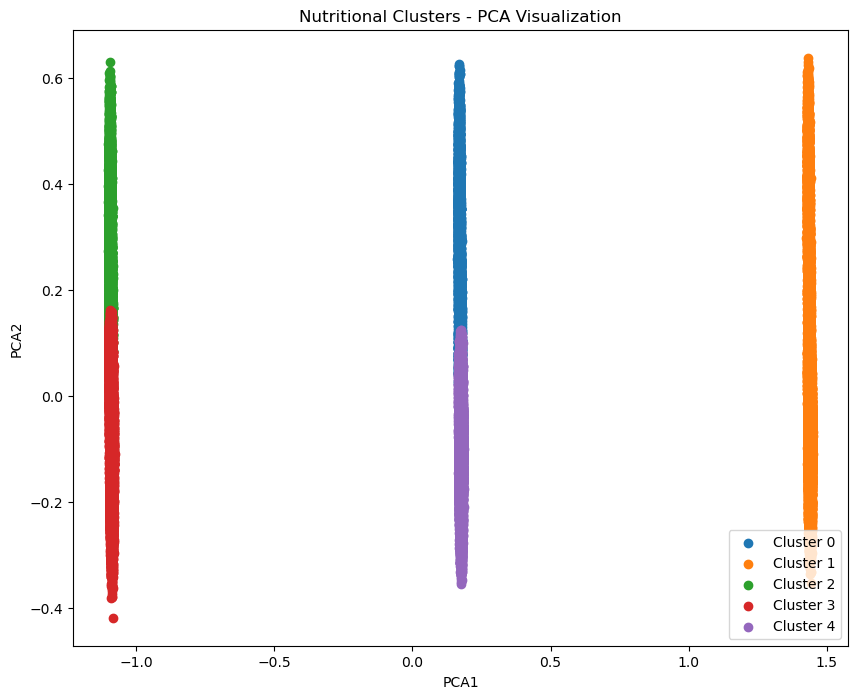

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # You can also use n_components=3 for a 3D plot
reduced_features = pca.fit_transform(nutritional_features)

# Add the cluster labels to the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['nutritional_cluster'] = df['nutritional_cluster']

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_data = reduced_df[reduced_df['nutritional_cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Nutritional Clusters - PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


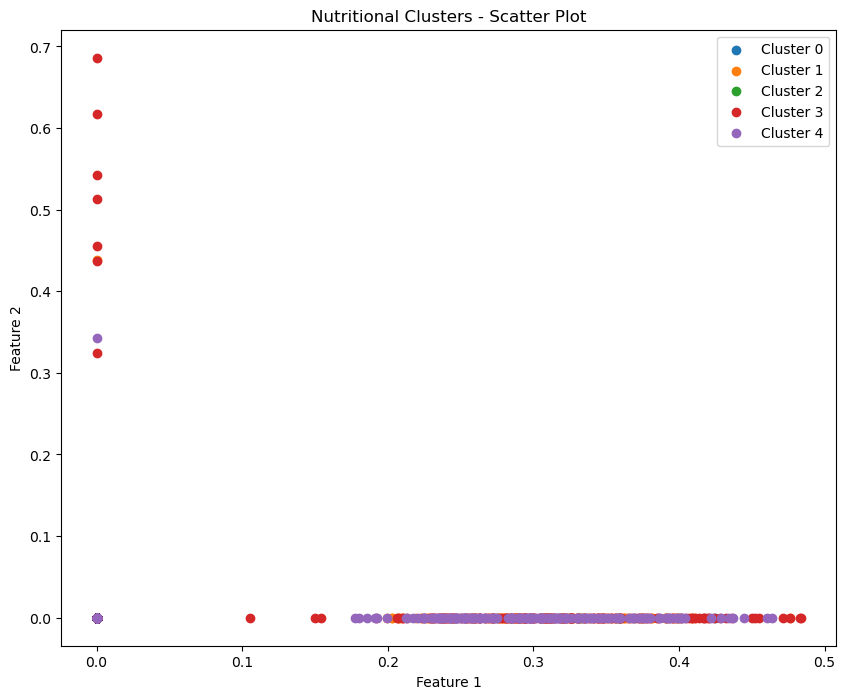

In [10]:
import matplotlib.pyplot as plt

# Scatter plot for 2D visualization
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_data = nutritional_features[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Nutritional Clusters - Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


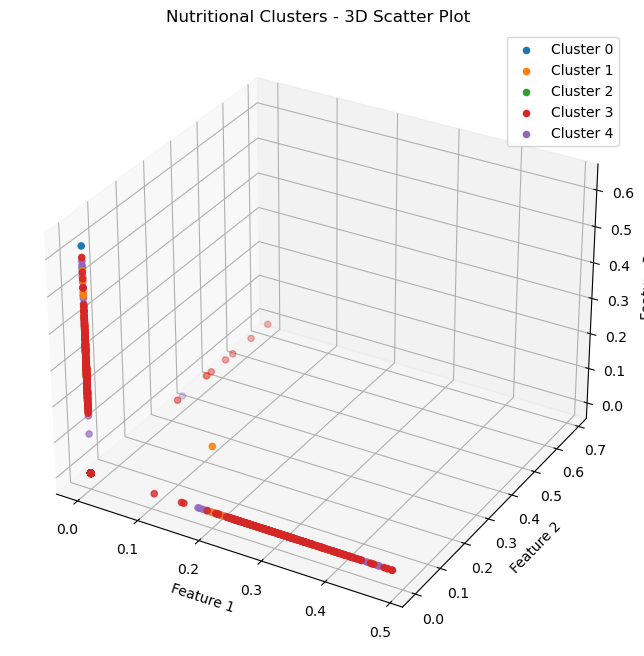

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot for 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    cluster_data = nutritional_features[clusters == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}')

ax.set_title('Nutritional Clusters - 3D Scatter Plot')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')  # Adjust based on your feature dimensions
ax.legend()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


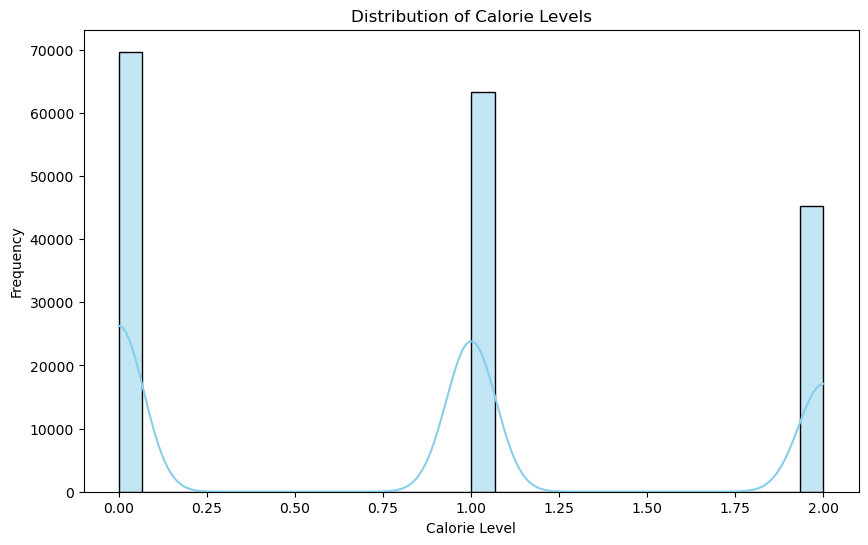

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of calorie levels
plt.figure(figsize=(10, 6))
sns.histplot(df['calorie_level'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Calorie Levels')
plt.xlabel('Calorie Level')
plt.ylabel('Frequency')
plt.show()


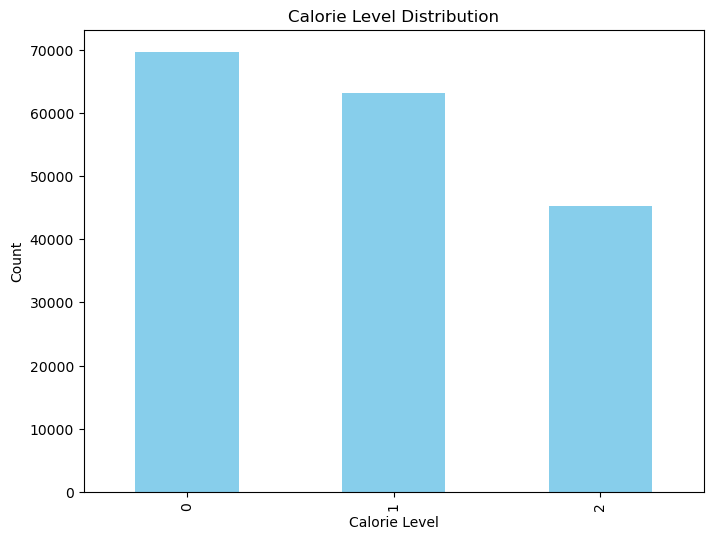

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("nutritional_clustered_data.csv")

# Bar chart for Calorie Level Distribution
plt.figure(figsize=(8, 6))
data['calorie_level'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Calorie Level Distribution')
plt.xlabel('Calorie Level')
plt.ylabel('Count')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


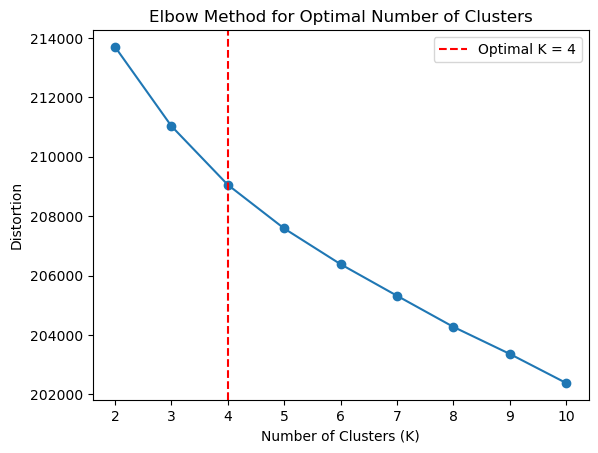

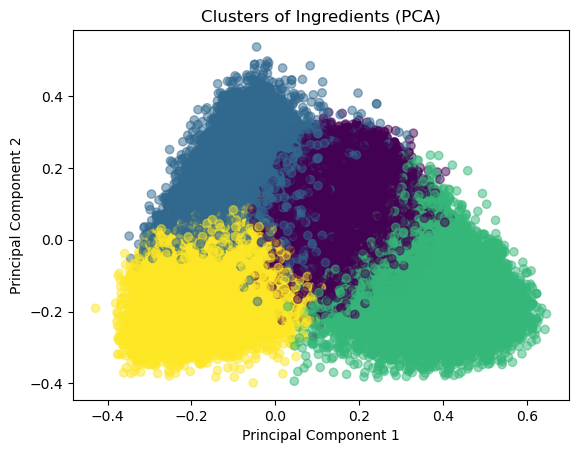

Top ingredients in Cluster 0:
ingredients
'sugar'     16097
'salt'      12048
'butter'    12016
Name: count, dtype: int64


Top ingredients in Cluster 1:
ingredients
'salt'      12132
'onion'     11004
'butter'     9451
Name: count, dtype: int64


Top ingredients in Cluster 2:
ingredients
'salt'             18503
'baking powder'    15598
'baking soda'      13162
Name: count, dtype: int64


Top ingredients in Cluster 3:
ingredients
'salt'             35444
'onion'            23346
'garlic cloves'    21395
Name: count, dtype: int64


Silhouette Score for 4 clusters: 0.01738857549819005


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load data
recipes = pd.read_csv('RAW_recipes.csv')

# Extract features for trend identification
tfidf_vectorizer = TfidfVectorizer(stop_words='english', norm='l2')
ingredients_tfidf = tfidf_vectorizer.fit_transform(recipes['ingredients'])

# Find optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(2, max_k+1):
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_clusters(ingredients_tfidf, max_clusters)

# Plot Elbow method with label tick for optimal K
plt.plot(range(2, max_clusters+1), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')

# Add label tick for optimal K
optimal_k = 4  # Adjust based on the Elbow plot
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

# Apply K-means clustering with optimal K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(ingredients_tfidf)

# Add cluster labels to the recipes dataframe
recipes['ingredient_cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
ingredients_pca = pca.fit_transform(ingredients_tfidf.toarray())

# Plot clusters
plt.scatter(ingredients_pca[:, 0], ingredients_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters of Ingredients (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the top ingredients in each cluster
for cluster_label in range(optimal_k):
    cluster_recipes = recipes[recipes['ingredient_cluster'] == cluster_label]
    top_ingredients = cluster_recipes['ingredients'].str.split(', ').explode().value_counts().head(3)
    print(f'Top ingredients in Cluster {cluster_label}:')
    print(top_ingredients)
    print('\n')

# Evaluate Silhouette score
silhouette_avg = silhouette_score(ingredients_tfidf, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')



Davies-Bouldin Index:

Similar to silhouette score, it measures the compactness and separation of clusters. Lower values indicate better clustering.

Different Clustering Algorithms:

Try different clustering algorithms such as K-means, hierarchical clustering, DBSCAN, or Gaussian Mixture Models. Different algorithms have different strengths, and the choice of algorithm can significantly impact results.

The Elbow method is used to determine the optimal number of clusters.
The clusters are visualized using PCA for a better understanding of the grouping.
Silhouette score is calculated to assess the quality of clustering.

# Uses KMean++

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


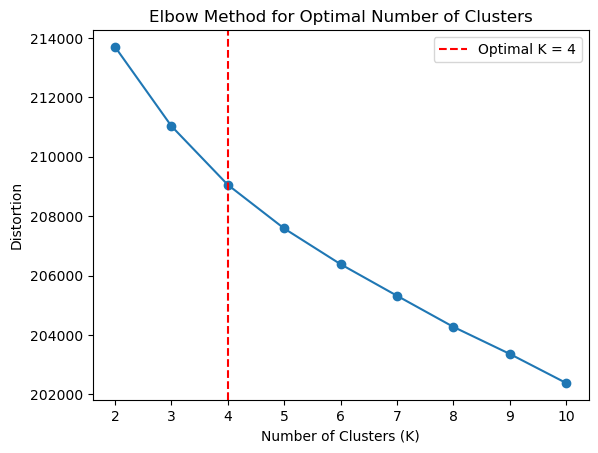

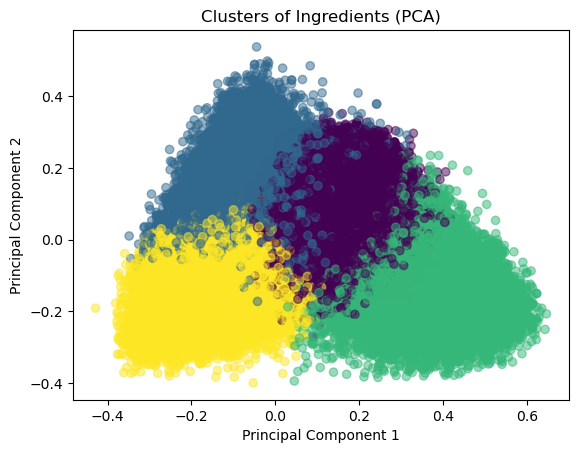

Top ingredients in Cluster 0:
ingredients
'sugar'     16097
'salt'      12048
'butter'    12016
Name: count, dtype: int64


Top ingredients in Cluster 1:
ingredients
'salt'      12132
'onion'     11004
'butter'     9451
Name: count, dtype: int64


Top ingredients in Cluster 2:
ingredients
'salt'             18503
'baking powder'    15598
'baking soda'      13162
Name: count, dtype: int64


Top ingredients in Cluster 3:
ingredients
'salt'             35444
'onion'            23346
'garlic cloves'    21395
Name: count, dtype: int64


Silhouette Score for 4 clusters: 0.01738857549819005


In [1]:
# Usess Kmean++
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load data
recipes = pd.read_csv('RAW_recipes.csv')

# Extract features for trend identification
tfidf_vectorizer = TfidfVectorizer(stop_words='english', norm='l2')
ingredients_tfidf = tfidf_vectorizer.fit_transform(recipes['ingredients'])

# Find optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(2, max_k+1):
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_clusters(ingredients_tfidf, max_clusters)

# Plot Elbow method with label tick for optimal K
plt.plot(range(2, max_clusters+1), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')

# Add label tick for optimal K
optimal_k = 4  # Adjust based on the Elbow plot
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

# Apply K-means clustering with optimal K and hyperparameter tuning
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', max_iter=300, tol=0.0001)
cluster_labels = kmeans_model.fit_predict(ingredients_tfidf)

# Add cluster labels to the recipes dataframe
recipes['ingredient_cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
ingredients_pca = pca.fit_transform(ingredients_tfidf.toarray())

# Plot clusters
plt.scatter(ingredients_pca[:, 0], ingredients_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters of Ingredients (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the top ingredients in each cluster
for cluster_label in range(optimal_k):
    cluster_recipes = recipes[recipes['ingredient_cluster'] == cluster_label]
    top_ingredients = cluster_recipes['ingredients'].str.split(', ').explode().value_counts().head(3)
    print(f'Top ingredients in Cluster {cluster_label}:')
    print(top_ingredients)
    print('\n')

# Evaluate Silhouette score
silhouette_avg = silhouette_score(ingredients_tfidf, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')


# Model Evaluation: Davies Bouldin Score 

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


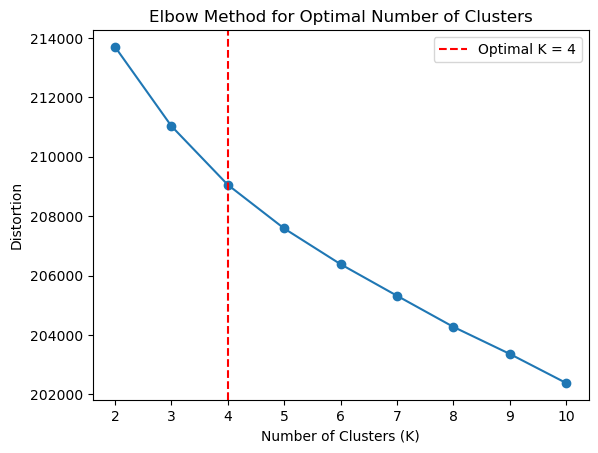

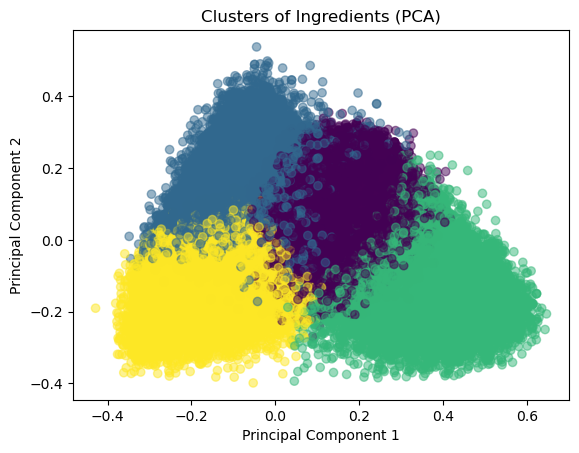

Top ingredients in Cluster 0:
ingredients
'sugar'     16097
'salt'      12048
'butter'    12016
Name: count, dtype: int64


Top ingredients in Cluster 1:
ingredients
'salt'      12132
'onion'     11004
'butter'     9451
Name: count, dtype: int64


Top ingredients in Cluster 2:
ingredients
'salt'             18503
'baking powder'    15598
'baking soda'      13162
Name: count, dtype: int64


Top ingredients in Cluster 3:
ingredients
'salt'             35444
'onion'            23346
'garlic cloves'    21395
Name: count, dtype: int64


Davies-Bouldin Index for 4 clusters: 6.3825824458812965


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score  # Import the Davies-Bouldin Index
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load data
recipes = pd.read_csv('RAW_recipes.csv')

# Extract features for trend identification
tfidf_vectorizer = TfidfVectorizer(stop_words='english', norm='l2')
ingredients_tfidf = tfidf_vectorizer.fit_transform(recipes['ingredients'])

# Find optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(2, max_k+1):
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_clusters(ingredients_tfidf, max_clusters)

# Plot Elbow method with label tick for optimal K
plt.plot(range(2, max_clusters+1), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')

# Add label tick for optimal K
optimal_k = 4  # Adjust based on the Elbow plot
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

# Apply K-means clustering with optimal K and hyperparameter tuning
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', max_iter=300, tol=0.0001)
cluster_labels = kmeans_model.fit_predict(ingredients_tfidf)

# Add cluster labels to the recipes dataframe
recipes['ingredient_cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
ingredients_pca = pca.fit_transform(ingredients_tfidf.toarray())

# Plot clusters
plt.scatter(ingredients_pca[:, 0], ingredients_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters of Ingredients (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the top ingredients in each cluster
for cluster_label in range(optimal_k):
    cluster_recipes = recipes[recipes['ingredient_cluster'] == cluster_label]
    top_ingredients = cluster_recipes['ingredients'].str.split(', ').explode().value_counts().head(3)
    print(f'Top ingredients in Cluster {cluster_label}:')
    print(top_ingredients)
    print('\n')

# Evaluate Davies-Bouldin Index (replace Silhouette score)
davies_bouldin_avg = davies_bouldin_score(ingredients_tfidf.toarray(), cluster_labels)
print(f'Davies-Bouldin Index for {optimal_k} clusters: {davies_bouldin_avg}')


        Principal Component 1  Principal Component 2  Cluster
0                   -0.020508               0.020560        0
1                    0.013383               0.128738        2
2                   -0.142610               0.022100        2
3                   -0.218847              -0.072294        1
4                   -0.050943              -0.175852        1
...                       ...                    ...      ...
231632              -0.291730              -0.186389        1
231633              -0.160242              -0.174770        1
231634              -0.119668               0.003820        1
231635               0.173173               0.107746        0
231636               0.432388              -0.041313        3

[231637 rows x 3 columns]


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


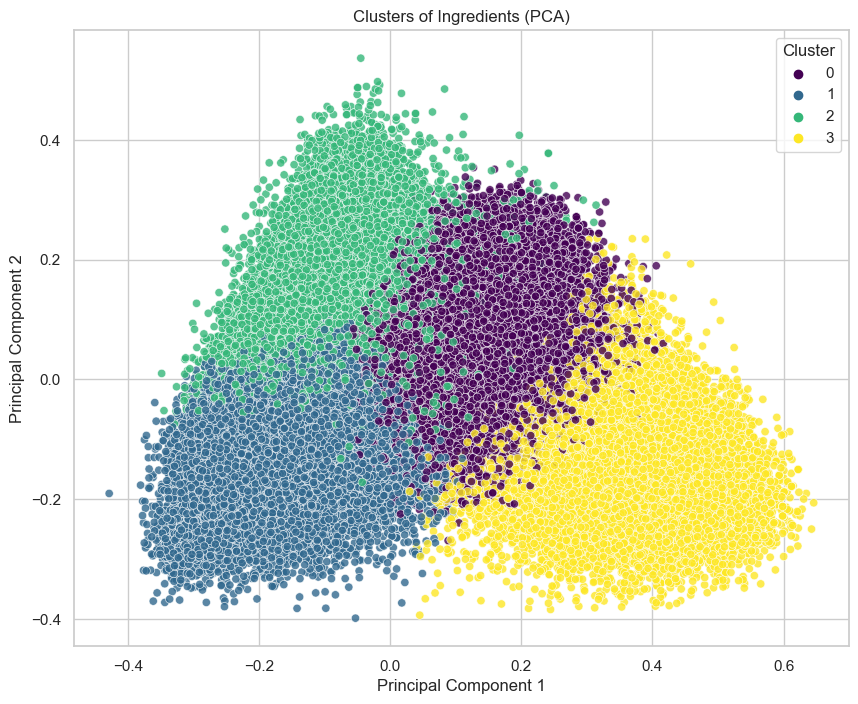

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize clusters using PCA
pca_df = pd.DataFrame(ingredients_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels
print(pca_df)

# Create a scatterplot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.8)
plt.title('Clusters of Ingredients (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster Interpretation:

Ingredients that are close to each other in the plot are likely to be similar based on their feature values. Therefore, clusters represent groups of ingredients that share similarities.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Top ingredients in Cluster 0:
ingredients
'sugar'     16097
'salt'      12047
'butter'    12015
Name: count, dtype: int64




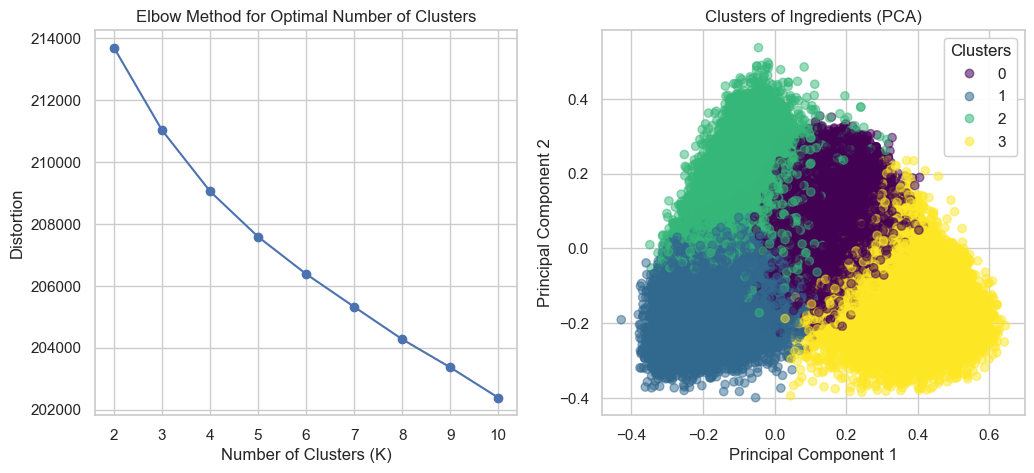

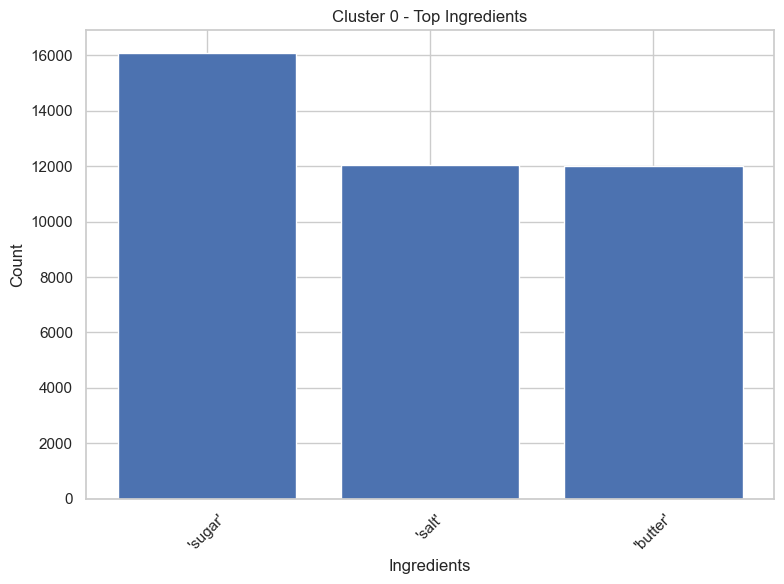

Top ingredients in Cluster 1:
ingredients
'salt'             35445
'onion'            23347
'garlic cloves'    21395
Name: count, dtype: int64




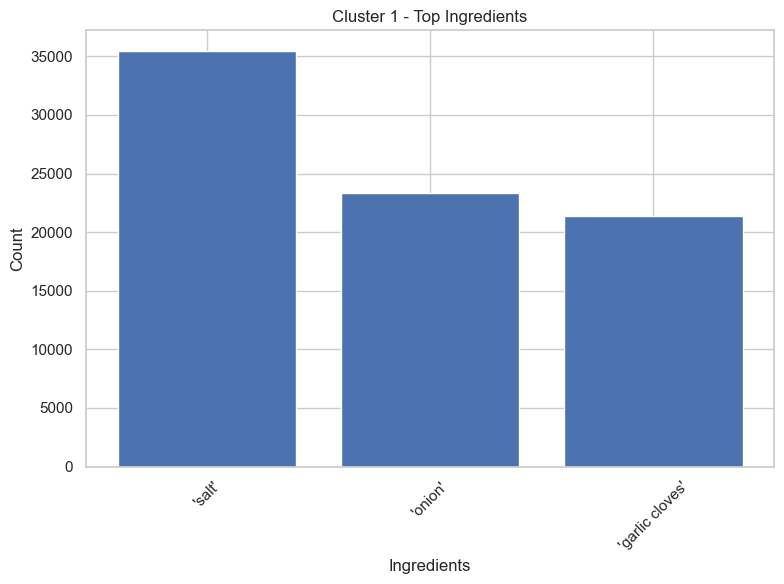

Top ingredients in Cluster 2:
ingredients
'salt'      12131
'onion'     11003
'butter'     9451
Name: count, dtype: int64




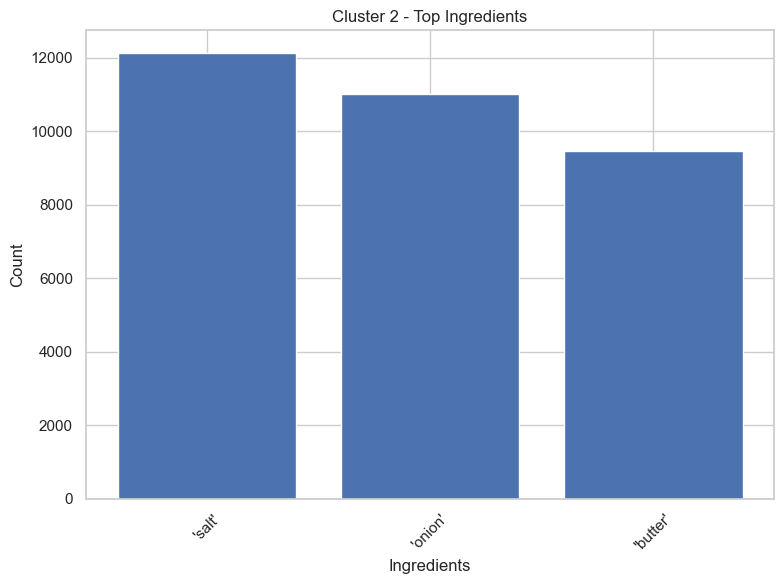

Top ingredients in Cluster 3:
ingredients
'salt'             18504
'baking powder'    15598
'baking soda'      13162
Name: count, dtype: int64




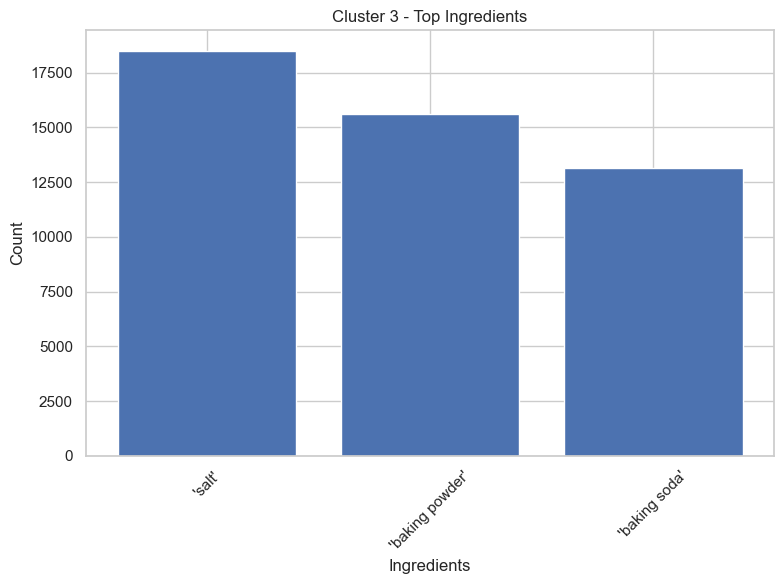

Silhouette Score for 4 clusters: 0.017389129944816974


<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Extract features for trend identification
tfidf_vectorizer = TfidfVectorizer(stop_words='english', norm='l2')
ingredients_tfidf = tfidf_vectorizer.fit_transform(recipes['ingredients'])

# Find optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(2, max_k + 1):
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_clusters(ingredients_tfidf, max_clusters)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Elbow method
axes[0].plot(range(2, max_clusters + 1), distortions, marker='o')
axes[0].set_title('Elbow Method for Optimal Number of Clusters')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Distortion')

# Choose the optimal number of clusters (K)
optimal_k = 4  # Adjust based on the Elbow plot

# Apply K-means clustering with optimal K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(ingredients_tfidf)

# Add cluster labels to the recipes dataframe
recipes['ingredient_cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
ingredients_pca = pca.fit_transform(ingredients_tfidf.toarray())

# Plot clusters
scatter = axes[1].scatter(ingredients_pca[:, 0], ingredients_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
axes[1].set_title('Clusters of Ingredients (PCA)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Add a legend
legend = axes[1].legend(*scatter.legend_elements(), title='Clusters')
axes[1].add_artist(legend)

# Display the top ingredients in each cluster
for cluster_label in range(optimal_k):
    cluster_recipes = recipes[recipes['ingredient_cluster'] == cluster_label]
    top_ingredients = cluster_recipes['ingredients'].str.split(', ').explode().value_counts().head(3)
    print(f'Top ingredients in Cluster {cluster_label}:')
    print(top_ingredients)
    print('\n')

    # Separate overlapping top ingredients cluster
    plt.figure(figsize=(8, 6))
    overlapping_cluster_recipes = recipes[recipes['ingredient_cluster'] == cluster_label]
    overlapping_top_ingredients = overlapping_cluster_recipes['ingredients'].str.split(', ').explode().value_counts().head(3)
    plt.bar(overlapping_top_ingredients.index, overlapping_top_ingredients.values)
    plt.title(f'Cluster {cluster_label} - Top Ingredients')
    plt.xlabel('Ingredients')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Evaluate Silhouette score
silhouette_avg = silhouette_score(ingredients_tfidf, cluster_labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

plt.tight_layout()
plt.show()


The top ingredients in different clusters. Each cluster seems to represent a group of recipes or food items, and the listed ingredients are the most frequently occurring ones within each cluster. Here's a brief interpretation for each cluster:

Cluster 0:

Top Ingredients: 'sugar', 'salt', 'butter'
This cluster include recipes or food items that heavily feature sugar, salt, and butter as key ingredients. It could represent a category of sweet or baked goods.

Cluster 1
Top Ingredients: 'salt', 'onion', 'garlic cloves'
This cluster is characterized by recipes or dishes that prominently use salt, onions, and garlic cloves. It might represent savory dishes, possibly with a focus on savory seasoning.

Cluster 2:

Top Ingredients: 'salt', 'onion', 'butter'
Similar to Cluster 1, this cluster also has salt, onions, and butter as dominant ingredients. It may include savory dishes with a buttery element.

Cluster 3:

Top Ingredients: 'salt', 'baking powder', 'baking soda'
This cluster appears to involve recipes that utilize salt, baking powder, and baking soda as primary ingredients. It suggests a focus on baked goods, given the presence of leavening agents like baking powder and baking soda.
In summary, each cluster represents a group of recipes or food items that share common top ingredients, providing insights into the dominant flavors or characteristics of each cluster.

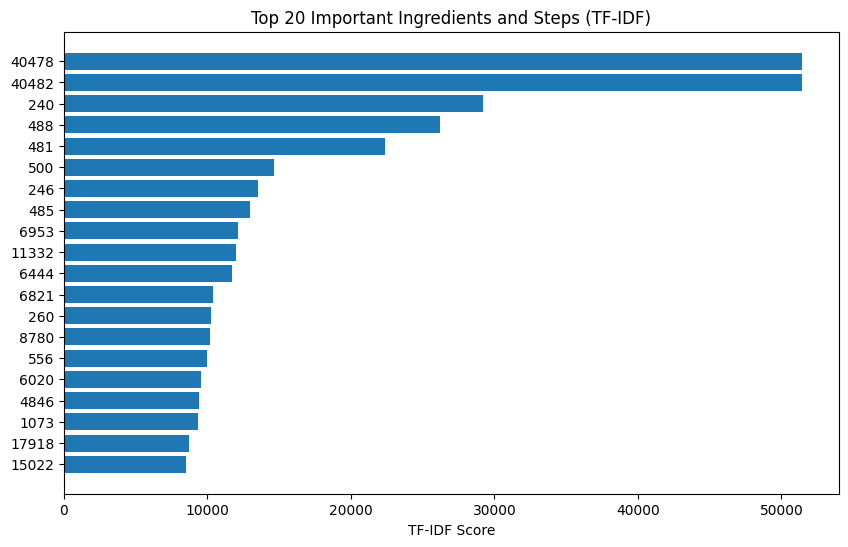

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Join ingredients and steps into a single text for TF-IDF analysis
combined_text = [' '.join(map(str, sublist)) for sublist in df['ingredient_tokens']] + [' '.join(map(str, sublist)) for sublist in df['steps_tokens']]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=False)
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Compute the TF-IDF scores for each term (ingredient or step)
tfidf_scores = tfidf_matrix.sum(axis=0)

# Convert the scores to a list and zip with feature names
scores = tfidf_scores.A1
feature_names = tfidf_vectorizer.get_feature_names_out()
term_scores = list(zip(feature_names, scores))

# Sort the terms by their TF-IDF scores
term_scores.sort(key=lambda x: x[1], reverse=True)

# Get the top N terms with the highest TF-IDF scores
top_n = 20
top_terms = term_scores[:top_n]

# Plotting the most important ingredients and steps based on TF-IDF
plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in top_terms][::-1], [item[1] for item in top_terms][::-1])
plt.xlabel('TF-IDF Score')
plt.title(f'Top {top_n} Important Ingredients and Steps (TF-IDF)')
plt.show()


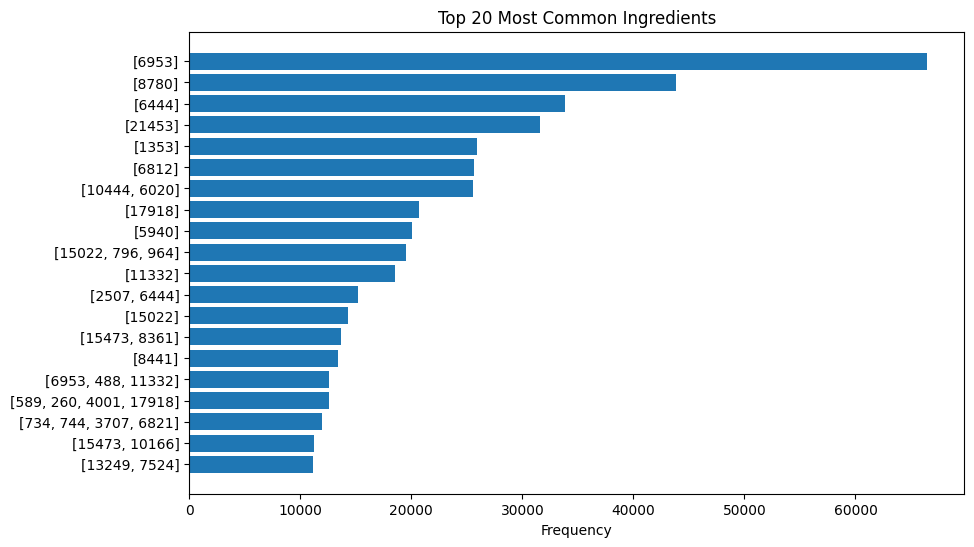

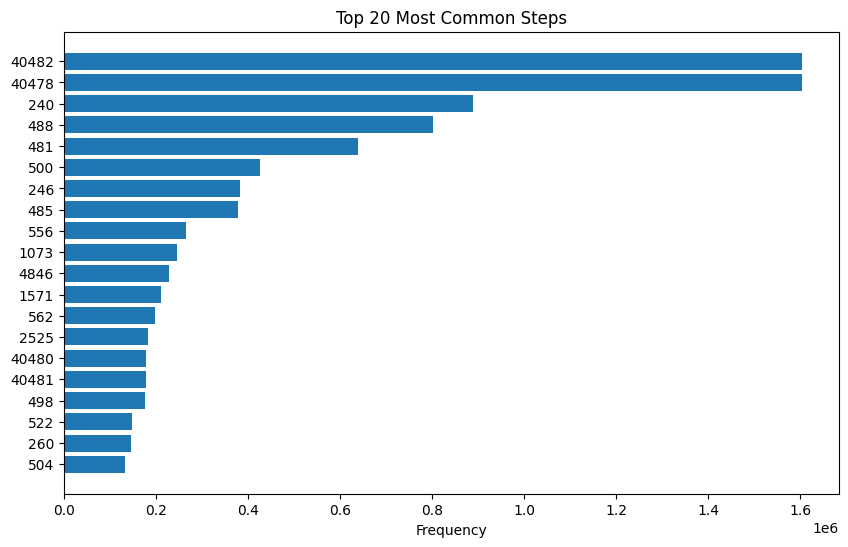

In [11]:
from collections import Counter
from itertools import chain

# Flatten the lists of ingredients and steps and convert items to strings
ingredients = [str(item) for item in list(chain.from_iterable(df['ingredient_tokens']))]
steps = [str(item) for item in list(chain.from_iterable(df['steps_tokens']))]

# Get the most common ingredients and steps
top_ingredients = Counter(ingredients).most_common(20)
top_steps = Counter(steps).most_common(20)

# Plotting the most common ingredients
plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in top_ingredients][::-1], [item[1] for item in top_ingredients][::-1])
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Ingredients')
plt.show()

# Plotting the most common steps
plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in top_steps][::-1], [item[1] for item in top_steps][::-1])
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Steps')
plt.show()


# Difficulty Level

Applied DBSCAN

In [4]:
# Takes a longer time
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Example: Replace missing values in 'calorie_level' with the mean
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
# Example: Convert 'name_tokens' from strings to lists
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=1)
difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)

# Use DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
difficulty_clusters = dbscan.fit_predict(difficulty_features[['combined_pca']])

# Add clusters to the original difficulty data
difficulty_features['cluster'] = difficulty_clusters

# Save the results
difficulty_features.to_csv('difficulty_data_clustered.csv', index=False)


NameError: name 'df' is not defined

Use minibatch because DBSCAN IS SLOW

In [1]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=1)
difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)

# Use MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
difficulty_clusters = kmeans.fit_predict(difficulty_features[['combined_pca']])

# Add clusters to the original difficulty data
difficulty_features['cluster'] = difficulty_clusters

# Save the results
difficulty_features.to_csv('difficulty_data_clustered.csv', index=False)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/1836499846.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)
/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/1836499846.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)
/Applications/anaconda

In [2]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Adjust the classifier based on your needs
from sklearn.metrics import accuracy_score, silhouette_score

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=1)
difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)

# Use MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
difficulty_clusters = kmeans.fit_predict(difficulty_features[['combined_pca']])

# Add clusters to the original difficulty data
difficulty_features['cluster'] = difficulty_clusters

# Add a new column for difficulty level based on clustering
difficulty_features['difficulty_level'] = difficulty_clusters  # Adjust this based on your classification model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(difficulty_features[['calorie_level', 'steps_length', 'combined_pca']], difficulty_features['difficulty_level'], test_size=0.2, random_state=42)

# Train a classification model (Adjust the classifier and parameters based on your needs)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict difficulty levels on the test set
y_pred = clf.predict(X_test)

# Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(difficulty_features[['combined_pca']], difficulty_clusters)
print("Silhouette Score:", silhouette_avg)

# Save the results
difficulty_features.to_csv('difficulty_data_clustered_with_classification.csv', index=False)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/203363901.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)
/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/203363901.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)
/Applications/anaconda3/

Classification Accuracy: 1.0
Silhouette Score: 0.5488843195379915


In [ ]:
#Before hyperparameter tuning 

import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Change this line for DecisionTreeClassifier
from sklearn.svm import SVC  # Change this line for SVM
from sklearn.metrics import accuracy_score, silhouette_score

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=1)
difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)

# Use MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
difficulty_clusters = kmeans.fit_predict(difficulty_features[['combined_pca']])

# Add clusters to the original difficulty data
difficulty_features['cluster'] = difficulty_clusters

# Add a new column for difficulty level based on clustering
difficulty_features['difficulty_level'] = difficulty_clusters  # Adjust this based on your classification model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(difficulty_features[['calorie_level', 'steps_length', 'combined_pca']], difficulty_features['difficulty_level'], test_size=0.2, random_state=42)

# Train a Decision Tree Classifier (Change this line for SVM or any other classifier)
# clf = DecisionTreeClassifier(random_state=42)
clf = SVC(random_state=42)  # Example using SVM
clf.fit(X_train, y_train)

# Predict difficulty levels on the test set
y_pred = clf.predict(X_test)

# Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(difficulty_features[['combined_pca']], difficulty_clusters)
print("Silhouette Score:", silhouette_avg)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/2604359363.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x)
/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/2604359363.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['combined_pca'] = pca.fit_transform(numeric_features)
/Applications/anaconda

Classification Accuracy: 0.7695285109247468


In [13]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, silhouette_score

# Load the dataset
file_path = 'PP_recipes.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(
    lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x
)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Split data into training and testing sets for clustering
X_cluster_train, X_cluster_test = train_test_split(
    numeric_features,
    test_size=0.2,
    random_state=42
)

# Apply PCA for dimensionality reduction with grid search
param_grid_pca = {'n_components': [1, 2, 3]}  # Add more values if needed
pca = PCA()
grid_search_pca = GridSearchCV(pca, param_grid_pca, cv=3)
grid_search_pca.fit(X_cluster_train)

# Best PCA components
best_n_components = grid_search_pca.best_params_['n_components']
print(f"Best n_components for PCA: {best_n_components}")

# Apply the best PCA transformation
pca = PCA(n_components=best_n_components)
X_cluster_train_pca = pca.fit_transform(X_cluster_train)
X_cluster_test_pca = pca.transform(X_cluster_test)

# Use MiniBatchKMeans clustering with grid search
param_grid_kmeans = {'n_clusters': [3, 5, 7]}  # Add more values if needed
kmeans = MiniBatchKMeans()
grid_search_kmeans = GridSearchCV(kmeans, param_grid_kmeans, cv=3)
grid_search_kmeans.fit(X_cluster_train_pca)

# Best number of clusters
best_n_clusters = grid_search_kmeans.best_params_['n_clusters']
print(f"Best n_clusters for KMeans: {best_n_clusters}")

# Use the best parameters for MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=best_n_clusters, random_state=42)
difficulty_clusters = kmeans.fit_predict(X_cluster_test_pca)

# Add clusters to the original difficulty data
difficulty_features['cluster'] = kmeans.predict(pca.transform(numeric_features))

# Add a new column for difficulty level based on clustering
difficulty_features['difficulty_level'] = difficulty_features['cluster']

# Split data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(
    difficulty_features[['calorie_level', 'steps_length', 'cluster']],
    difficulty_features['difficulty_level'],
    test_size=0.2,
    random_state=42
)

# Train a SVM Classifier
clf = SVC(random_state=42)
clf.fit(X_train, y_train)

# Predict difficulty levels on the test set
y_pred = clf.predict(X_test)

# Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster_test_pca, difficulty_clusters)
print("Silhouette Score:", silhouette_avg)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_11714/3995357957.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Applicatio

Best n_components for PCA: 1


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 t

Best n_clusters for KMeans: 7


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_11714/3995357957.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['cluster'] = kmeans.predict(pca.transform(numeric_features))
/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_11714/3995357957.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['difficulty_level'] = difficulty_features['cluster']


Classification Accuracy: 0.6811208032984601
Silhouette Score: 0.5325462112671788


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

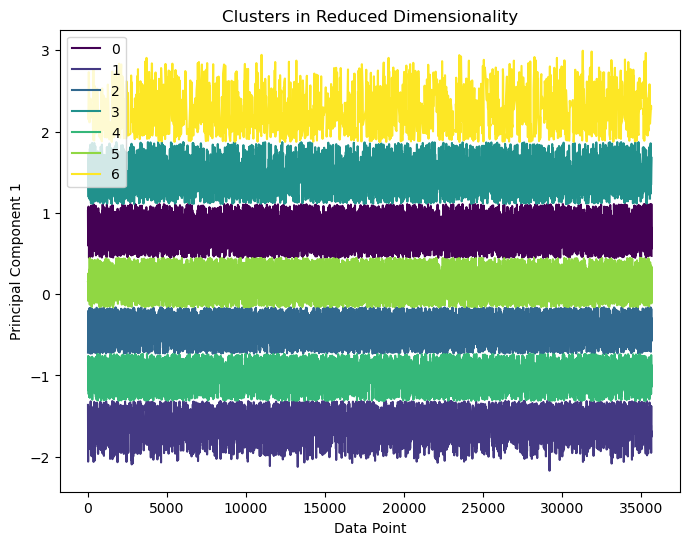

In [14]:
# Visualize clusters in reduced dimensionality
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(X_cluster_test_pca) + 1), y=X_cluster_test_pca[:, 0], hue=difficulty_clusters, palette='viridis')
plt.title('Clusters in Reduced Dimensionality')
plt.xlabel('Data Point')
plt.ylabel('Principal Component 1')
plt.show()


In [19]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer  # Import the imputer
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score


# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
mean_calorie_level = df['calorie_level'].mean()
df['calorie_level'].fillna(mean_calorie_level, inplace=True)

# Formatting data types (if needed)
df['name_tokens'] = df['name_tokens'].apply(eval)
df['ingredient_tokens'] = df['ingredient_tokens'].apply(eval)
df['steps_tokens'] = df['steps_tokens'].apply(eval)

# Extract relevant features for difficulty classification
difficulty_features = df[['steps_tokens', 'calorie_level']]

# Convert sequences to numerical representation (sum of ingredient lengths)
difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(
    lambda x: sum(map(lambda el: len(str(el)), x)) if isinstance(x, list) else x
)

# Standardize the numeric features
numeric_features = StandardScaler().fit_transform(difficulty_features[['calorie_level', 'steps_length']])

# Split data into training and testing sets for clustering
X_cluster_train, X_cluster_test = train_test_split(
    numeric_features,
    test_size=0.2,
    random_state=42
)

# Apply PCA for dimensionality reduction with grid search
param_grid_pca = {'n_components': [1, 2, 3]}  # Add more values if needed
pca = PCA()
grid_search_pca = GridSearchCV(pca, param_grid_pca, cv=3)
grid_search_pca.fit(X_cluster_train)

# Best PCA components
best_n_components = grid_search_pca.best_params_['n_components']
print(f"Best n_components for PCA: {best_n_components}")

# Apply the best PCA transformation
pca = PCA(n_components=best_n_components)
X_cluster_train_pca = pca.fit_transform(X_cluster_train)
X_cluster_test_pca = pca.transform(X_cluster_test)

# Use MiniBatchKMeans clustering with grid search
param_grid_kmeans = {'n_clusters': [3, 5, 7]}  # Add more values if needed
kmeans = MiniBatchKMeans()
grid_search_kmeans = GridSearchCV(kmeans, param_grid_kmeans, cv=3)
grid_search_kmeans.fit(X_cluster_train_pca)

# Best number of clusters
best_n_clusters = grid_search_kmeans.best_params_['n_clusters']
print(f"Best n_clusters for KMeans: {best_n_clusters}")

# Use the best parameters for MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=best_n_clusters, random_state=42)
difficulty_clusters = kmeans.fit_predict(X_cluster_test_pca)

# Add clusters to the original difficulty data
difficulty_features['cluster'] = kmeans.predict(pca.transform(numeric_features))

# Add a new column for difficulty level based on clustering
difficulty_features['difficulty_level'] = difficulty_features['cluster']

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster_test_pca, difficulty_clusters)
print("Silhouette Score:", silhouette_avg)

# Determine difficulty level based on silhouette scores
# You can adjust these threshold values based on your specific dataset
easy_threshold = 0.3
medium_threshold = 0.5

difficulty_features['difficulty_level'] = 'Medium'  # Default to Medium
difficulty_features.loc[silhouette_avg < easy_threshold, 'difficulty_level'] = 'Easy'
difficulty_features.loc[silhouette_avg > medium_threshold, 'difficulty_level'] = 'Hard'

# Split data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(
    difficulty_features[['calorie_level', 'steps_length', 'cluster']],
    difficulty_features['difficulty_level'],
    test_size=0.2,
    random_state=42
)

# Use SimpleImputer to handle missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a RandomForestClassifier
clf = SVC(random_state=42)
#clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Predict difficulty levels on the test set
y_pred = clf.predict(X_test_imputed)
print(y_pred)

# Evaluate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)


Missing Values:
 id                   0
i                    0
name_tokens          0
ingredient_tokens    0
steps_tokens         0
techniques           0
calorie_level        0
ingredient_ids       0
dtype: int64


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/2565653869.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['steps_length'] = difficulty_features['steps_tokens'].apply(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Applicatio

Best n_components for PCA: 1


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 t

Best n_clusters for KMeans: 7
Silhouette Score: 0.5325296583213486


/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/2565653869.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features['difficulty_level'] = 'Medium'  # Default to Medium
/var/folders/d4/nyf3l8rd78v2b70sry_9hlt40000gn/T/ipykernel_19836/2565653869.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficulty_features.loc[silhouette_avg < easy_threshold, 'difficulty_level'] = 'Easy'


['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']
Classification Accuracy: 0.9999719526560835


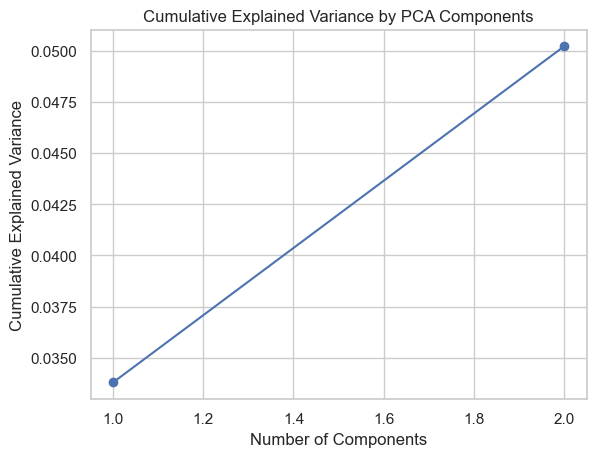

In [62]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


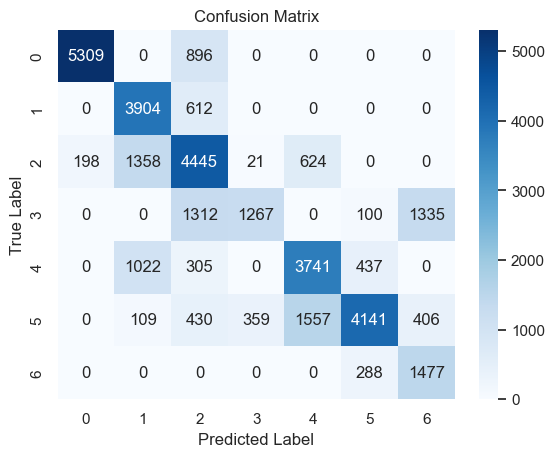

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


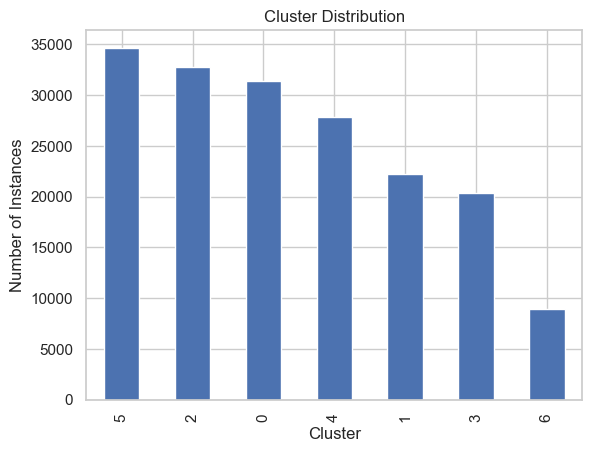

In [65]:
difficulty_features['cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


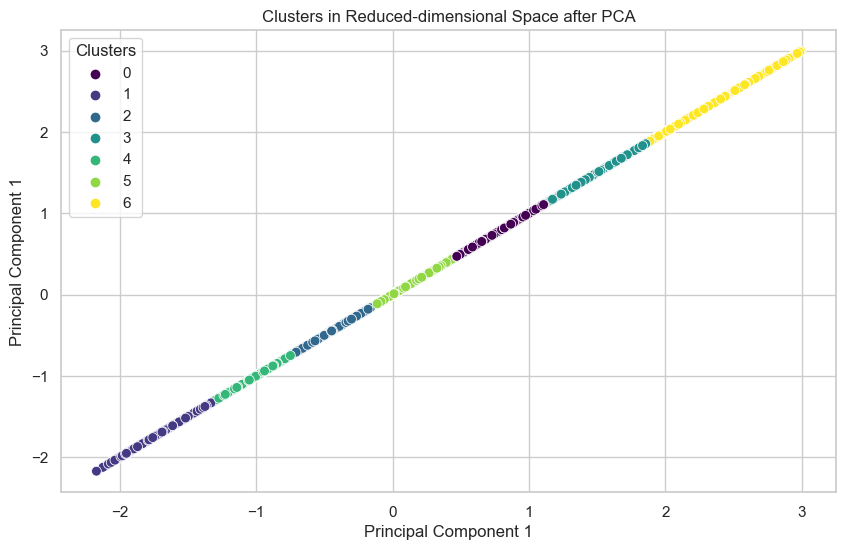

In [61]:
# Scatter Plot for Clusters in Reduced-dimensional Space after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_cluster_test_pca[:, 0], y=X_cluster_test_pca[:, 0], hue=difficulty_clusters, palette='viridis', s=50)
plt.title('Clusters in Reduced-dimensional Space after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')  # Use the same component for both axes
plt.legend(title='Clusters')
plt.show()
